In [2]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 5.9 MB/s 
     |████████████████████████████████| 448 kB 47.6 MB/s 


In [34]:
import re
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import platform                
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [160]:
cd /content/drive/MyDrive/project_ie/

/content/drive/MyDrive/project_ie


In [111]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [166]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버'
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학',
           '에게','에서','라서','이라서','에요','와','만','나','로','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요',
           '때','거','다','이다','이나','에도','것','고','게','인데','제','까지','에는','엔','이라','작성자','게시','고민','조언','비슷한',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯']

## 데이터 불러오기

In [171]:
jk = pd.read_csv('jk.csv')
cafe = pd.read_csv('cafe.csv')
orbi = pd.read_csv('orbi.csv')

In [167]:
def word_cloud(data):
  comment = data['content']
  comment = comment.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
  okt = Okt()
  morphs = []
  for sentence in comment:
    morphs.append(okt.pos(sentence))
  word_list = []
  for i in morphs:
      for word, tag in i:
          if tag in['Noun']:
              word_list.append(word)
          elif tag in['Adjective']:
              word_list.append(word)
  new_word_list = []
  for word in word_list:
    if word not in stopwords:
      new_word_list.append(word)
  count = Counter(new_word_list)
  words = (dict(count.most_common()))
  wordcloud = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
  cloud = wordcloud.generate_from_frequencies(words)
  plt.figure(figsize=(10,8))
  plt.axis('off')
  plt.imshow(cloud)
  plt.show()

## 잡코리아

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


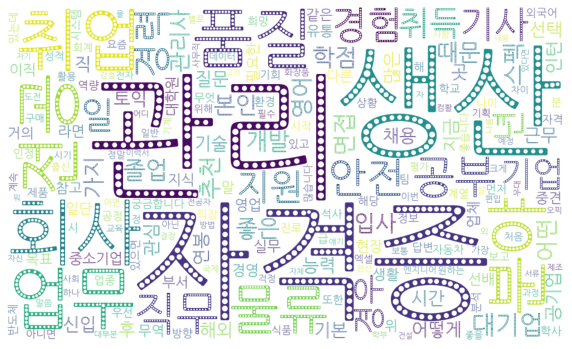

In [168]:
word_cloud(jk)

In [169]:
df = cafe.append(jk)

## 네이버 카페 (독취사 & 스펙업)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


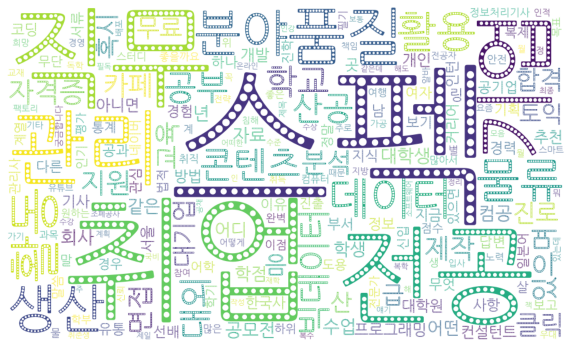

In [172]:
word_cloud(cafe)

## 잡코리아 + 네이버 카페

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


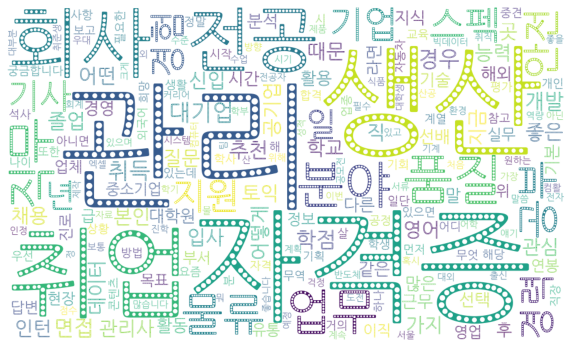

In [170]:
word_cloud(df)

## 오르비

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


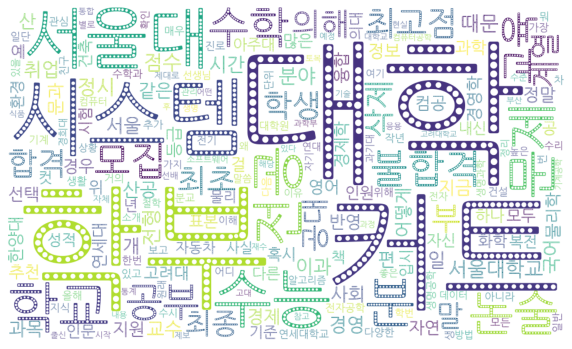

In [173]:
word_cloud(orbi)